# SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections as collections 
import os

#np.set_printoptions(threshold=np.inf)

from collections import Counter    
from mlxtend.frequent_patterns import apriori, association_rules

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

from scipy.sparse import csr_matrix


anime = pd.read_csv('anime_with_genre_separated.csv')
animeWGenre = pd.read_csv('data/anime_cleaned.csv')
users = pd.read_csv('users_cleaned_with_location.csv')
anime_list = pd.read_csv('animelists_cleaned.csv')


In [2]:
#EDA starts 
animeWGenre

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,...,NaN,[],NaN,NaN,Collaboration Works,Hentai,[],[],30.0,2018.0
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,NaN,"{'Prequel': [{'mal_id': 36775, 'type': 'anime'...",NaN,NaN,2:10 Animation,"Slice of Life, Drama, Romance",[],[],0.0,2018.0
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,げんきげんきノンタン おばけむらめいろ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,NaN,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",NaN,NaN,Polygon Pictures,"Music, Kids",[],[],35.0,2015.0
6666,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ミスターメン リトルミス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Picture book,0,Currently Airing,...,NaN,[],NaN,NaN,Sanrio,Kids,[],[],2.0,2013.0


In [3]:
anime.head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,...,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,...,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,...,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,...,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,...,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,...,0,0,0,1,0,0,0,0,0,0


In [4]:
anime.head().T


,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
anime_id,11013,2104,5262,721,12365
title,Inu x Boku SS,Seto no Hanayome,Shugo Chara!! Doki,Princess Tutu,Bakuman. 3rd Season
title_english,Inu X Boku Secret Service,My Bride is a Mermaid,Shugo Chara!! Doki,Princess Tutu,Bakuman.
title_japanese,妖狐×僕SS,瀬戸の花嫁,しゅごキャラ！！どきっ,プリンセスチュチュ,バクマン。
...,...,...,...,...,...
Horror,0,0,0,0,0
Cars,0,0,0,0,0
Kids,0,0,0,0,0
Mystery,0,0,0,0,0


In [5]:
pd.set_option('display.max_columns', None)
anime.head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,Ecchi,Police,Shoujo Ai,Josei,Fantasy,Action,Martial Arts,Military,Slice of Life,Harem,Music,Drama,Hentai,Yaoi,Supernatural,Thriller,Romance,Shoujo,Parody,Adventure,Magic,Psychological,School,Samurai,Historical,Sports,Vampire,Yuri,Super Power,Space,Comedy,Shounen Ai,Dementia,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sph

In [6]:
anime_list.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [7]:
users.head()

,Unnamed: 0,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,city,country
0,0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,NaN,india
1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states
2,2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701,NaN,mexico
3,3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697,NaN,malaysia
4,4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847,nederland,united states


# EDA

Text(0.5, 1.0, 'Anime users Dropped Anime vs. Users who Dropped Anime')

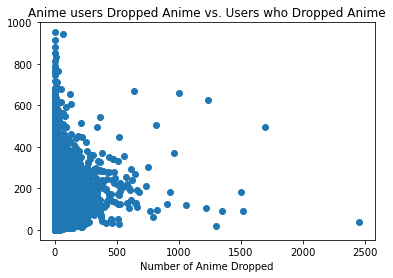

In [8]:
#How many users watch anime vs. how many anime the user dropped

user_dropped = users.user_dropped
days_anime_watched = users.user_days_spent_watching

plt.scatter(user_dropped,days_anime_watched)

plt.xlabel('Number of Anime Dropped')
plt.ylabel('')
plt.title('Anime users Dropped Anime vs. Users who Dropped Anime')

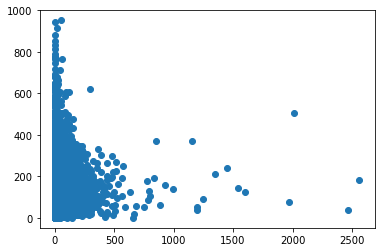

In [9]:
user_onhold = users.user_onhold
plt.scatter(user_onhold, days_anime_watched)

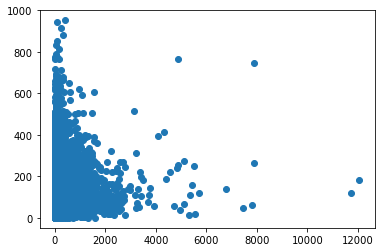

In [10]:
user_plantowatch= users.user_plantowatch
plt.scatter(user_plantowatch, days_anime_watched)

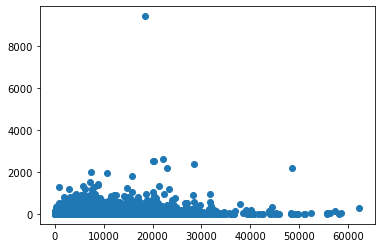

In [11]:
#number of episodes watched vs number of days anime watched 
stats_episodes = users.stats_episodes
stats_rewatched = users.stats_rewatched
plt.scatter(stats_episodes, stats_rewatched)

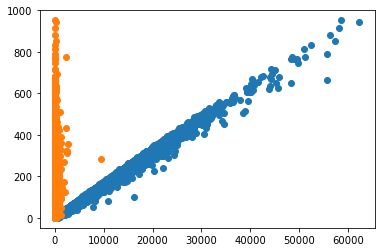

In [12]:
plt.scatter(stats_episodes, days_anime_watched)
plt.scatter(stats_rewatched, days_anime_watched)

In [13]:
#Change birthday to age and add age column 

import datetime as DT

now = pd.Timestamp('now')

users['birth_date'] = pd.to_datetime(users['birth_date'], format='%Y-%m-%d %H:%M:%S') 

users['birth_date'] = users['birth_date'].where(users['birth_date'] < now, users['birth_date'] -  np.timedelta64(100, 'Y')) 
users['age'] = (now - users['birth_date']).astype('<m8[Y]')    
print(users)

        Unnamed: 0        username  user_id  user_watching  user_completed  \
0                0        karthiga  2255153              3              49   
1                1       Damonashu    37326             45             195   
2                2           bskai   228342             25             414   
3                3  terune_uzumaki   327311              5               5   
4                4           Bas_G  5015094             35             114   
...            ...             ...      ...            ...             ...   
108706      108706          isoann   797785             14             213   
108707      108707        bumcakee  1396285             13             116   
108708      108708       Scarlet95  2478991              6             103   
108709      108709        Torasori  3975907             22             239   
108710      108710          HMicca  1289601             11              73   

        user_onhold  user_dropped  user_plantowatch  user_days_

Text(0.5, 1.0, 'User Age vs. Days Anime Watched')

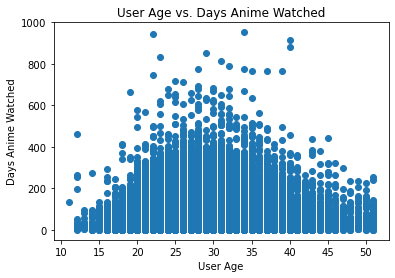

In [14]:
plt.scatter(users.age, days_anime_watched)

plt.xlabel('User Age')
plt.ylabel('Days Anime Watched')
plt.title('User Age vs. Days Anime Watched')

Text(0.5, 1.0, 'User Age vs. Days Anime Watched')

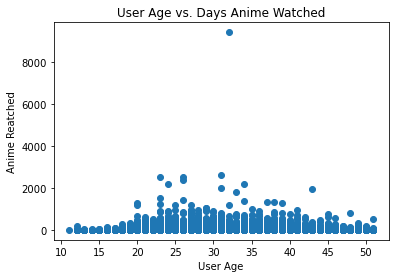

In [15]:
plt.scatter(users.age, stats_rewatched)
plt.xlabel('User Age')
plt.ylabel('Anime Reatched')
plt.title('User Age vs. Days Anime Watched')

Text(0.5, 1.0, 'User Age vs. Days Anime Watched')

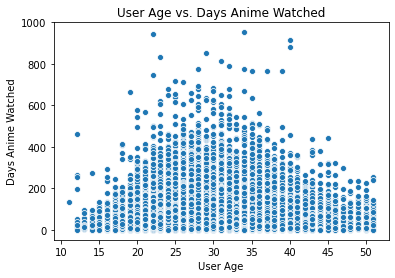

In [16]:
age = users.age

sns.scatterplot(data=users, x="age", y="user_days_spent_watching")

plt.xlabel('User Age')
plt.ylabel('Days Anime Watched')
plt.title('User Age vs. Days Anime Watched')

Text(0.5, 1.0, 'User Age vs. Days Anime Watched (with Labels)')

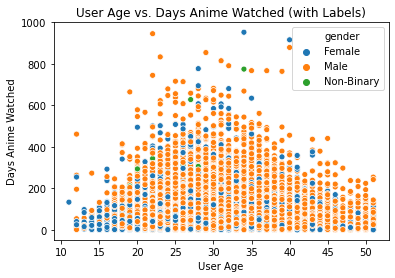

In [17]:
sns.scatterplot(data=users, x="age", y="user_days_spent_watching", hue="gender")

plt.xlabel('User Age')
plt.ylabel('Days Anime Watched')
plt.title('User Age vs. Days Anime Watched (with Labels)')

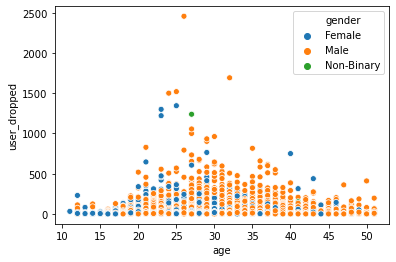

In [18]:
sns.scatterplot(data=users, x="age", y="user_dropped", hue="gender")

Text(0.5, 1.0, 'User Age vs. Number of Animes Completed')

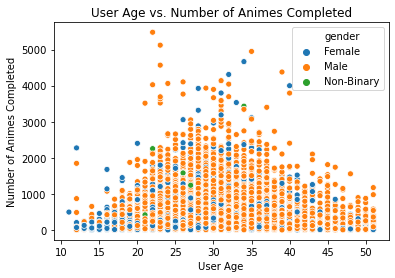

In [19]:
sns.scatterplot(data=users, x="age", y="user_completed", hue="gender")

plt.xlabel('User Age')
plt.ylabel('Number of Animes Completed')
plt.title('User Age vs. Number of Animes Completed')


Text(0.5, 1.0, 'User Age vs. Number of Animes Completed')

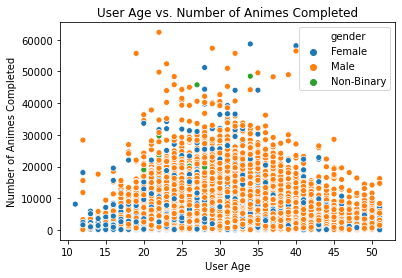

In [20]:
sns.scatterplot(data=users, x="age", y="stats_episodes", hue="gender")

plt.xlabel('User Age')
plt.ylabel('Number of Animes Completed')
plt.title('User Age vs. Number of Animes Completed')

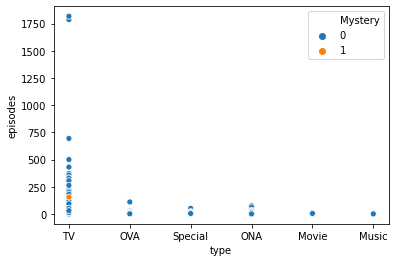

In [21]:
sns.scatterplot(data=anime, x="type", y="episodes", hue="Mystery")

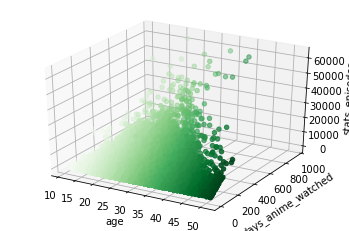

In [22]:
#3-D plotting

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(age, days_anime_watched, stats_episodes, c=age, cmap='Greens');
ax.set_xlabel('age')
ax.set_ylabel('days_anime_watched')
ax.set_zlabel('stats_episodes');

In [23]:
#Check any null values
anime_list.isnull().values.any()

True

In [24]:
anime.isnull().values.any()

True

In [25]:
users.isnull().values.any()

True

In [26]:
anime.isnull().values.any()

True

In [27]:
anime.isnull().sum()

Unnamed: 0           0
anime_id             0
title                0
title_english     3230
title_japanese       5
                  ... 
Horror               0
Cars                 0
Kids                 0
Mystery              0
Mecha                0
Length: 77, dtype: int64

In [28]:
anime = anime.dropna(subset=['title_english'])


In [29]:
anime.isnull().sum()

Unnamed: 0        0
anime_id          0
title             0
title_english     0
title_japanese    0
                 ..
Horror            0
Cars              0
Kids              0
Mystery           0
Mecha             0
Length: 77, dtype: int64

In [30]:
#Find null values
anime_list.isnull().sum()

username                    243
anime_id                      0
my_watched_episodes           0
my_start_date                 0
my_finish_date                0
my_score                      0
my_status                     0
my_rewatching           6878247
my_rewatching_ep              0
my_last_updated               0
my_tags                29290313
dtype: int64

In [31]:
anime.isnull().sum()

Unnamed: 0        0
anime_id          0
title             0
title_english     0
title_japanese    0
                 ..
Horror            0
Cars              0
Kids              0
Mystery           0
Mecha             0
Length: 77, dtype: int64

In [32]:
users.isnull().sum()

Unnamed: 0                       0
username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                           0
location                         5
birth_date                       0
access_rank                 108711
join_date                        0
last_online                      0
stats_mean_score                 0
stats_rewatched                  0
stats_episodes                   0
city                         75436
country                      26976
age                              0
dtype: int64

In [33]:
#Remove rows that == null for city, country, & access_rank
users = users.dropna(subset=['city', 'country'])


In [34]:
users.isnull().sum()

Unnamed: 0                      0
username                        0
user_id                         0
user_watching                   0
user_completed                  0
user_onhold                     0
user_dropped                    0
user_plantowatch                0
user_days_spent_watching        0
gender                          0
location                        0
birth_date                      0
access_rank                 33275
join_date                       0
last_online                     0
stats_mean_score                0
stats_rewatched                 0
stats_episodes                  0
city                            0
country                         0
age                             0
dtype: int64

In [35]:
users

,Unnamed: 0,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,city,country,age
1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0
4,4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847,nederland,united states,21.0
9,9,jimothy000,47167,6,0,0,0,2,2.040972,Male,"England,Manchester",1995-04-25,NaN,2008-04-01 00:00:00,2008-04-27 16:00:00,9.33,5.0,126,manchester,united states,25.0
13,13,Xinil,1,4,230,8,89,60,109.438194,Male,California,1985-03-04,NaN,2004-11-05 00:00:00,2018-05-14 18:02:55,7.37,58.0,6536,california,united states,35.0
15,15,hood_rad,4538087,1,314,0,1,160,79.272569,Male,Hamilton Ontario,1997-10-31,NaN,2015-04-04 00:00:00,2018-03-23 21:54:16,0.00,0.0,4800,hamilton,united states,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108696,108696,alesos,3476081,4,70,1,17,13,30.246528,Male,"Havirov, Czech Republic",1987-02-10,NaN,2014-01-10 00:00:00,2018-05-13 12:34:11,6.43,0.0,1782,havirov,czechia,33.0
108701,108701,Dusty9797,3067837,31,86,3,4,54,30.613194,Male,"Denver, Colorado",1997-11-10,NaN,2013-08-19 00:00:00,2014-11-24 06:38:00,8.41,0.0,1844,denver,united states,23.0
108704,108704,yoyoman9,6454558,2,32,6,7,2,24.177778,Male,Boston,1999-06-27,NaN,2017-08-03 00:00:00,2017-12-17 11:27:00,7.50,0.0,1483,boston,united states,21.0
108707,108707,bumcakee,1396285,13,116,5,9,22,41.365972,Female,"nhollywood, california",1998-07-18,NaN,2012-07-14 00:00:00,2017-02-14 00:30:00,8.86,24.0,2537,california,united states,22.0


In [36]:
anime_list.my_score.count()

31284030

In [37]:
anime_list.my_score.values

array([ 9,  7,  7, ...,  8,  9, 10])

In [38]:
anime_list.my_score.unique()

array([ 9,  7,  6,  8, 10,  5,  0,  4,  2,  3,  1])

In [39]:
anime_list.my_score.mean()

4.652314775302287

In [40]:
anime_list

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [41]:
anime_list.to_csv('anime_list_nullsRemoved.csv')

In [42]:
anime_list_noNull = pd.read_csv('anime_list_nullsRemoved.csv')

In [43]:
# assign meaning to score 
anime_list_noNull["recommend_anime"] = anime_list["my_score"] > 5

In [44]:
anime_list_noNull.recommend_anime

0           True
1           True
2           True
3           True
4           True
            ... 
31284025    True
31284026    True
31284027    True
31284028    True
31284029    True
Name: recommend_anime, Length: 31284030, dtype: bool

In [45]:
users.to_csv('users_importantNullsRemoved.csv')

In [46]:
users_mostNullsRemoved = pd.read_csv('users_importantNullsRemoved.csv')

In [48]:
#top 5 countries with most users that watch anime
return_counter(users_mostNullsRemoved, 'country', 5)


{'united states': 19211, 'brazil': 1693, 'canada': 1501, 'united kingdom': 1067, 'indonesia': 677}


In [49]:
#merge the two datasets 
combined_usernameWithAnime = pd.merge(users_mostNullsRemoved, anime_list_noNull, on="username")


In [50]:
combined_usernameWithAnime

,Unnamed: 0_x,Unnamed: 0.1,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,city,country,age,Unnamed: 0_y,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,recommend_anime
0,1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0,53,21,418,0000-00-00,0000-00-00,10,1,0.0,0,2009-09-30 07:39:05,NaN,True
1,1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0,54,232,1,0000-00-00,0000-00-00,0,4,NaN,0,2009-10-18 20:50:57,NaN,False
2,1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0,55,249,167,0000-00-00,0000-00-00,4,2,0.0,0,1970-01-01 00:00:00,NaN,False
3,1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0,56,269,0,0000-00-00,0000-00-00,2,4,NaN,0,1970-01-01 00:00:00,NaN,False
4,1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,detroit,united states,29.0,57,853,26,0000-00-00,2009-07-31,6,2,0.0,0,2009-07-31 21:07:47,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698757,108710,108710,HMicca,1289601,11,73,2,2,16,64.431250,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05 00:00:00,2012-11-15 08:10:00,8.89,11.0,3822,birmingham,united states,25.0,17456801,9441,13,0000-00-00,0000-00-00,9,2,NaN,0,2012-07-20 14:28:31,NaN,True
8698758,108710,108710,HMicca,1289601,11,73,2,2,16,64.431250,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05 00:00:00,2012-11-15 08:10:00,8.89,11.0,3822,birmingham,united states,25.0,17456802,12461,11,0000-00-00,0000-00-00,9,1,0.0,0,2012-06-14 23:31:37,NaN,True
8698759,108710,108710,HMicca,1289601,11,73,2,2,16,64.431250,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05 00:00:00,2012-11-15 08:10:00,8.89,11.0,3822,birmingham,united states,25.0,17456803,5671,25,0000-00-00,0000-00-00,7,2,NaN,0,2012-05-06 19:45:39,NaN,True
8698760,108710,108710,HMicca,1289601,11,73,2,2,16,64.431250,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05 00:00:00,2012-11-15 08:10:00,8.89,11.0,3822,birmingham,united states,25.0,17456804,521,52,0000-00-00,0000-00-00,8,2,NaN,0,2012-07-20 14:18:39,NaN,True


In [51]:
data_200 = combined_usernameWithAnime[combined_usernameWithAnime['user_id'].isin(range(200))]


In [52]:
favorable_ratings = data_200[data_200["recommend_anime"]]
favorable_ratings

,Unnamed: 0_x,Unnamed: 0.1,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,city,country,age,Unnamed: 0_y,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,recommend_anime
680,13,13,Xinil,1,4,230,8,89,60,109.438194,Male,California,1985-03-04,NaN,2004-11-05 00:00:00,2018-05-14 18:02:55,7.37,58.0,6536,california,united states,35.0,5011,21,626,2003-09-21,0000-00-00,9,1,0.0,0,2013-12-23 04:33:04,"action, adventure, pirates, comedy",True
681,13,13,Xinil,1,4,230,8,89,60,109.438194,Male,California,1985-03-04,NaN,2004-11-05 00:00:00,2018-05-14 18:02:55,7.37,58.0,6536,california,united states,35.0,5012,59,26,2002-12-26,2002-12-30,9,2,0.0,0,1970-01-01 00:00:00,"ecchi, comedy",True
682,13,13,Xinil,1,4,230,8,89,60,109.438194,Male,California,1985-03-04,NaN,2004-11-05 00:00:00,2018-05-14 18:02:55,7.37,58.0,6536,california,united states,35.0,5013,120,26,2002-04-02,2002-04-08,9,2,0.0,0,1970-01-01 00:00:00,"drama, romance",True
684,13,13,Xinil,1,4,230,8,89,60,109.438194,Male,California,1985-03-04,NaN,2004-11-05 00:00:00,2018-05-14 18:02:55,7.37,58.0,6536,california,united states,35.0,5015,210,161,2004-10-12,2004-11-09,7,2,0.0,0,1970-01-01 00:00:00,comedy,True
685,13,13,Xinil,1,4,230,8,89,60,109.438194,Male,California,1985-03-04,NaN,2004-11-05 00:00:00,2018-05-14 18:02:55,7.37,58.0,6536,california,united states,35.0,5016,249,167,2004-02-12,2004-09-19,7,2,0.0,0,1970-01-01 00:00:00,monsters,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280292,61472,61472,Hiromi,66,34,148,13,6,10,54.977778,Male,"Calgary, AB",1990-02-09,NaN,2005-04-01 00:00:00,2011-03-13 04:07:00,7.53,50.0,3265,calgary,canada,30.0,21750977,838,4,2005-05-04,0000-00-00,6,3,0.0,0,1970-01-01 00:00:00,NaN,True
5280295,61472,61472,Hiromi,66,34,148,13,6,10,54.977778,Male,"Calgary, AB",1990-02-09,NaN,2005-04-01 00:00:00,2011-03-13 04:07:00,7.53,50.0,3265,calgary,canada,30.0,21750980,876,29,2001-11-20,2002-01-03,6,2,0.0,0,1970-01-01 00:00:00,NaN,True
5280296,61472,61472,Hiromi,66,34,148,13,6,10,54.977778,Male,"Calgary, AB",1990-02-09,NaN,2005-04-01 00:00:00,2011-03-13 04:07:00,7.53,50.0,3265,calgary,canada,30.0,21750981,346,13,2005-08-26,2005-08-28,6,2,0.0,0,1970-01-01 00:00:00,NaN,True
5280297,61472,61472,Hiromi,66,34,148,13,6,10,54.977778,Male,"Calgary, AB",1990-02-09,NaN,2005-04-01 00:00:00,2011-03-13 04:07:00,7.53,50.0,3265,calgary,canada,30.0,21750982,456,2,2005-07-23,0000-00-00,6,3,0.0,0,1970-01-01 00:00:00,NaN,True


In [53]:
anime.head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,Ecchi,Police,Shoujo Ai,Josei,Fantasy,Action,Martial Arts,Military,Slice of Life,Harem,Music,Drama,Hentai,Yaoi,Supernatural,Thriller,Romance,Shoujo,Parody,Adventure,Magic,Psychological,School,Samurai,Historical,Sports,Vampire,Yuri,Super Power,Space,Comedy,Shounen Ai,Dementia,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sph

In [54]:
#anime = anime.filter(['anime_id', 'title_english', 'studio'])
#anime.head()

In [55]:
animeWGenre = animeWGenre.filter(['anime_id', 'title_english', 'studio', 'genre'])

In [56]:
# filter data 
userIDwAnime = combined_usernameWithAnime.filter(['user_id', 'anime_id', 'my_watched_episodes', 'my_score', 'recommend_anime' ])

In [57]:
userIDwAnime

,user_id,anime_id,my_watched_episodes,my_score,recommend_anime
0,37326,21,418,10,True
1,37326,232,1,0,False
2,37326,249,167,4,False
3,37326,269,0,2,False
4,37326,853,26,6,True
...,...,...,...,...,...
8698757,1289601,9441,13,9,True
8698758,1289601,12461,11,9,True
8698759,1289601,5671,25,7,True
8698760,1289601,521,52,8,True


In [58]:
# merge dataset
data = pd.merge(userIDwAnime, anime, on='anime_id') 

In [59]:
data

,user_id,anime_id,my_watched_episodes,my_score,recommend_anime,Unnamed: 0,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,Ecchi,Police,Shoujo Ai,Josei,Fantasy,Action,Martial Arts,Military,Slice of Life,Harem,Music,Drama,Hentai,Yaoi,Supernatural,Thriller,Romance,Shoujo,Parody,Adventure,Magic,Psychological,School,Samurai,Historical,Sports,Vampire,Yuri,Super Power,Space,Comedy,Shounen Ai,Dementia,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,37326,21,418,10,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,21,626,9,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,18867,21,438,9,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,19539,21,13,0,False,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,6658717,21,36,9,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Ada

In [60]:
data.groupby('title_english')['my_score'].mean().sort_values(ascending=False).head() 


title_english
Diary                                      7.500000
Spirited Away                              7.426066
Death Note                                 7.317272
Code Geass: Lelouch of the Rebellion R2    7.251762
One Punch Man                              7.096708
Name: my_score, dtype: float64

In [61]:
data.groupby('title_english')['my_score'].count().sort_values(ascending=False).head() 


title_english
Death Note                              23825
Code Geass: Lelouch of the Rebellion    19754
Elfen Lied                              19109
Fullmetal Alchemist: Brotherhood        18712
Naruto                                  18545
Name: my_score, dtype: int64

In [62]:
ratings = pd.DataFrame(data.groupby('title_english')['my_score'].mean())  


In [63]:
ratings['num of ratings'] = pd.DataFrame(data.groupby('title_english')['my_score'].count()) 


In [64]:
ratings.head() 


,my_score,num of ratings
title_english,,
.Koni-chan,3.561404,57
.hack//Gift,3.938356,1022
.hack//Legend Of The Twilight,4.652020,2822
.hack//Liminality,4.235067,1557
".hack//Quantum: Go, Our Chim Chims!!",2.160338,237


In [65]:
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 

In [66]:
ratings['num of ratings'].i

AttributeError: 'Series' object has no attribute 'i'

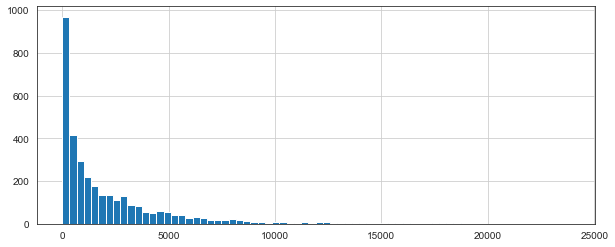

In [67]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 



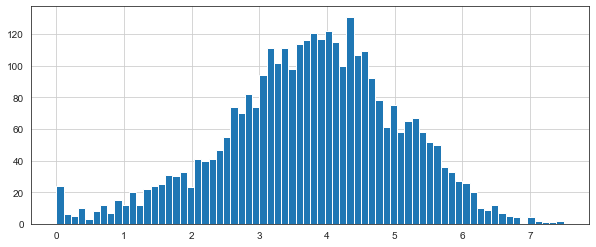

In [68]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['my_score'].hist(bins = 70) 

In [137]:
moviemat = data.pivot_table(index ='user_id', 
              columns ='title_english', values ='my_score') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,my_score,num of ratings
title_english,,
Death Note,7.317272,23825
Code Geass: Lelouch of the Rebellion,6.851574,19754
Elfen Lied,6.199435,19109
Fullmetal Alchemist: Brotherhood,6.845447,18712
Naruto,6.380049,18545
Bleach,6.063803,18510
Sword Art Online,6.447423,18278
Toradora!,6.423712,18168
Fullmetal Alchemist,6.716641,17956


In [141]:
anime

#EDA ENDS Here

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,Ecchi,Police,Shoujo Ai,Josei,Fantasy,Action,Martial Arts,Military,Slice of Life,Harem,Music,Drama,Hentai,Yaoi,Supernatural,Thriller,Romance,Shoujo,Parody,Adventure,Magic,Psychological,School,Samurai,Historical,Sports,Vampire,Yuri,Super Power,Space,Comedy,Shounen Ai,Dementia,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.00,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.00,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.00,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.00,2002.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by

In [74]:
#Merge two tables based on Anime ID

data = pd.merge(userIDwAnime, anime, on='anime_id') 

In [75]:
data.head()

,user_id,anime_id,my_watched_episodes,my_score,recommend_anime,Unnamed: 0,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,Ecchi,Police,Shoujo Ai,Josei,Fantasy,Action,Martial Arts,Military,Slice of Life,Harem,Music,Drama,Hentai,Yaoi,Supernatural,Thriller,Romance,Shoujo,Parody,Adventure,Magic,Psychological,School,Samurai,Historical,Sports,Vampire,Yuri,Super Power,Space,Comedy,Shounen Ai,Dementia,Demons,Game,Sci-Fi,Shounen,Seinen,Horror,Cars,Kids,Mystery,Mecha
0,37326,21,418,10,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,21,626,9,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,18867,21,438,9,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,19539,21,13,0,False,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,6658717,21,36,9,True,34,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Ada

In [82]:
genrecols = ['Military', 'Game', 'Ecchi', 'Music', 'Space', 'Yaoi', 'Horror', 'Comedy', 'Harem', 'School', 'Psychological', 'Mecha', 'Shounen', 'Drama', 'Hentai', 'Shounen Ai', 'Magic', 'Demons', 'Yuri', 'Mystery', 'Kids', 'Shoujo Ai', 'Slice of Life', 'Super Power', 'Cars', 'Josei', 'Shoujo', 'Action', 'Historical', 'Seinen', 'Sci-Fi', 'Thriller', 'Dementia', 'Samurai', 'Sports', 'Police', 'Vampire', 'Fantasy', 'Supernatural', 'Adventure', 'Martial Arts', 'Romance', 'Parody']

In [84]:
mdf = pd.melt(data[['user_id', 'my_score'] + genrecols], 
              id_vars=['user_id', 'my_score'], var_name='genre')
print(mdf)

           user_id  my_score     genre  value
0            37326        10  Military      0
1                1         9  Military      0
2            18867         9  Military      0
3            19539         0  Military      0
4          6658717         9  Military      0
...            ...       ...       ...    ...
309283300  1006745         0    Parody      0
309283301  1719201         0    Parody      0
309283302  6468297         7    Parody      0
309283303  6468297         6    Parody      0
309283304  6468297         7    Parody      0

[309283305 rows x 4 columns]


In [138]:
mdf = mdf[mdf['value']==1][['user_id', 'my_score', 'genre']]


KeyError: 'value'

In [139]:
df = pd.pivot_table(mdf, columns = ['genre'], index = ['user_id'], 
                    values = ['my_score'], aggfunc = np.mean)

In [140]:
print(df)


         my_score                                                         \
genre      Action Adventure Cars    Comedy  Dementia    Demons     Drama   
user_id                                                                    
1        5.515625  5.589744  7.0  5.398649  5.714286  5.888889  5.488722   
37       7.200000  6.800000  NaN  5.423077       NaN  8.000000  5.886792   
66       7.517857  7.226415  NaN  7.126316  4.000000  7.571429  7.009615   
81       7.916667  8.074074  NaN  7.692308  8.000000  8.166667  8.454545   
112      8.875000  8.500000  NaN  8.600000       NaN  9.000000  9.000000   
...           ...       ...  ...       ...       ...       ...       ...   
7203895  5.660377  6.172414  NaN  5.714286  0.000000  3.333333  5.153846   
7214883  5.190840  5.247312  NaN  5.403846  4.000000  5.370370  5.052632   
7233614  6.564356  6.538462  NaN  5.928230  6.333333  4.750000  5.727273   
7242686  0.000000  0.000000  NaN  0.000000       NaN  0.000000  0.000000   
7249032  8.3

In [88]:
df

my_score                                                         \
genre      Action Adventure Cars    Comedy  Dementia    Demons     Drama   
user_id                                                                    
1        5.515625  5.589744  7.0  5.398649  5.714286  5.888889  5.488722   
37       7.200000  6.800000  NaN  5.423077       NaN  8.000000  5.886792   
66       7.517857  7.226415  NaN  7.126316  4.000000  7.571429  7.009615   
81       7.916667  8.074074  NaN  7.692308  8.000000  8.166667  8.454545   
112      8.875000  8.500000  NaN  8.600000       NaN  9.000000  9.000000   
...           ...       ...  ...       ...       ...       ...       ...   
7203895  5.660377  6.172414  NaN  5.714286  0.000000  3.333333  5.153846   
7214883  5.190840  5.247312  NaN  5.403846  4.000000  5.370370  5.052632   
7233614  6.564356  6.538462  NaN  5.928230  6.333333  4.750000  5.727273   
7242686  0.000000  0.000000  NaN  0.000000       NaN  0.000000  0.000000   
7249032  8.333333  8.538462  NaN  7.826087  8.000000  8.000000  8.166667   

                                                                             \
genre       Ecchi   Fantasy      Game     Harem Hentai Historical    Horror   
user_id                                                                       
1        4.710526  4.450704  6.000000  4.208333    5.0   5.416667  5.136364   
37       3.111111  7.190476  8.500000  3.750000    NaN   4.750000  5.666667   
66       7.500000  7.068966  8.600000  7.500000    NaN   7.545455  7.375000   
81       8.000000  8.263158  8.500000       NaN    NaN   7.571429  7.500000   
112      9.000000  8.166667       NaN  9.000000    NaN        NaN       NaN   
...           ...       ...       ...       ...    ...        ...       ...   
7203895  4.000000  5.892857  5.250000       NaN    NaN   5.250000  6.857143   
7214883  4.111111  5.011628  2.818182  4.900000    NaN   2.750000  5.896552   
7233614  6.277778  6.346667  6.235294  5.515152    NaN   0.000000  7.333333   
7242686  0.000000  0.000000  0.000000  0.000000    NaN   0.000000  0.000000   
7249032  7.500000  8.583333  7.000000       NaN    NaN   8.800000  8.285714   

                                                                              \
genre       Josei      Kids     Magic Martial Arts     Mecha  Military Music   
user_id                                                                        
1        5.833333  7.000000  4.500000     6.454545  5.571429  6.275862   8.8   
37       5.333333       NaN  5.733333          NaN  8.333333  7.400000   9.5   
66       8.333333  7.181818  6.892857     7.000000  7.480000  7.391304   8.0   
81       7.666667       NaN  8.272727     8.333333  7.692308  8.285714   5.5   
112      8.000000       NaN  6.000000    10.000000       NaN       NaN   8.0   
...           ...       ...       ...          ...       ...       ...   ...   
7203895       NaN  7.000000  3.909091     7.750000  4.500000  8.428571   NaN   
7214883  5.000000  8.142857  4.125000     7.312500  4.300000  7.250000   4.0   
7233614  0.000000  7.125000  6.432432     6.750000  6.800000  4.500000   6.6   
7242686       NaN  0.000000  0.000000     0.000000  0.000000  0.000000   NaN   
7249032  8.000000       NaN  8.166667     9.000000  9.000000  8.625000   8.0   

                                                                         \
genre     Mystery    Parody    Police Psychological   Romance   Samurai   
user_id                                                                   
1        5.368421  5.000000  7.444444      5.312500  5.431193  5.700000   
37       6.000000  0.000000  9.000000      6.000000  5.421053  0.000000   
66       6.562500  4.600000  7.333333      6.357143  7.350000  7.500000   
81       7.842105  8.000000  8.500000      8.250000  8.000000  8.000000   
112           NaN       NaN       NaN           NaN  9.000000       NaN   
...           ...       ...       ...           ...       ...       ...   
7203895  7.200000  7.166667  8.666667    

In [90]:
df.isnull().values.any()

True

In [91]:
df.isnull().sum()

          genre        
my_score  Action             222
          Adventure          564
          Cars             26068
          Comedy             130
          Dementia          9076
          Demons            3337
          Drama              451
          Ecchi             3046
          Fantasy            589
          Game              8112
          Harem             3900
          Hentai           27910
          Historical        3401
          Horror            3164
          Josei            12427
          Kids             16750
          Magic             1599
          Martial Arts      4503
          Mecha             3478
          Military          2513
          Music             7653
          Mystery           1370
          Parody            4667
          Police            5154
          Psychological     2147
          Romance            639
          Samurai           8695
          School            1108
          Sci-Fi            1211
          Seinen   

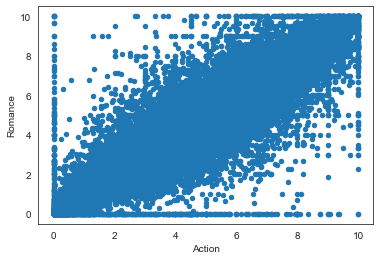

In [92]:
 X = df.my_score.plot.scatter(x ='Action', y ='Romance')


In [93]:
#remove the null values from action , romance
# check how to apply kmeans on dataset :) 
df.my_score.Action.isnull().values.any()

True

In [94]:
df.describe()

my_score                                                         \
genre        Action     Adventure         Cars        Comedy      Dementia   
count  33050.000000  32708.000000  7204.000000  33142.000000  24196.000000   
mean       5.334883      5.517552     5.358559      5.368490      4.971836   
std        2.328130      2.384577     3.787858      2.304687      3.242280   
min        0.000000      0.000000     0.000000      0.000000      0.000000   
25%        3.871795      4.111111     0.000000      3.944444      2.333333   
50%        5.632862      5.900000     7.000000      5.682284      5.444444   
75%        7.008325      7.238095     8.500000      7.036129      7.800000   
max       10.000000     10.000000    10.000000     10.000000     10.000000   

                                                                             \
genre        Demons         Drama         Ecchi       Fantasy          Game   
count  29935.000000  32821.000000  30226.000000  32683.000000  25160.000000   
mean       5.000746      5.423332      4.856153      5.287922      5.049909   
std        2.728588      2.360241      2.546786      2.372743      2.836324   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.111111      3.928571      3.111111      3.800000      3.100000   
50%        5.333333      5.716216      5.181818      5.593750      5.500000   
75%        7.058824      7.167832      6.794042      7.000000      7.222222   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                            \
genre         Harem       Hentai    Historical        Horror         Josei   
count  29372.000000  5362.000000  29871.000000  30108.000000  20845.000000   
mean       4.828373     4.030227      4.876292      5.058849      4.246545   
std        2.650621     3.285861      2.833203      2.630816      3.301821   
min        0.000000     0.000000      0.000000      0.000000      0.000000   
25%        3.000000     0.000000      2.736842      3.285714      0.000000   
50%        5.173913     4.909091      5.090909      5.333333      4.437500   
75%        6.857601     7.000000      7.111111      7.000000      7.000000   
max       10.000000    10.000000     10.000000     10.000000     10.000000   

                                                                             \
genre          Kids         Magic  Martial Arts         Mecha      Military   
count  16522.000000  31673.000000  28769.000000  29794.000000  30759.000000   
mean       5.158683      5.202552      5.112518      5.098528      5.403421   
std        3.089768      2.541101      2.837296      2.787632      2.717175   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.553191      3.200000      3.105263      3.600000   
50%        6.000000      5.543860      5.571429      5.500000      5.818182   
75%        7.500000      7.058824      7.285714      7.250000      7.500000   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                             \
genre         Music       Mystery        Parody        Police Psychological   
count  25619.000000  31902.000000  28605.000000  28118.000000  31125.000000   
mean       4.771049      5.145564      4.945917      5.463650      5.297070   
std        3.087581      2.519818      2.848572      3.094658      2.581818   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.285714      3.439545      2.875000      3.200000      3.571429   
50%        5.000000      5.361508      5.235294      6.000000      5.571429   
75%        7.333333      7.000000      7.166667      8.000000      7.246575   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                            

In [95]:

#fill null values with median values 
df = df.fillna((df.median()))


In [108]:
df

my_score                                                         \
genre      Action Adventure Cars    Comedy  Dementia    Demons     Drama   
user_id                                                                    
1        5.515625  5.589744  7.0  5.398649  5.714286  5.888889  5.488722   
37       7.200000  6.800000  7.0  5.423077  5.444444  8.000000  5.886792   
66       7.517857  7.226415  7.0  7.126316  4.000000  7.571429  7.009615   
81       7.916667  8.074074  7.0  7.692308  8.000000  8.166667  8.454545   
112      8.875000  8.500000  7.0  8.600000  5.444444  9.000000  9.000000   
...           ...       ...  ...       ...       ...       ...       ...   
7203895  5.660377  6.172414  7.0  5.714286  0.000000  3.333333  5.153846   
7214883  5.190840  5.247312  7.0  5.403846  4.000000  5.370370  5.052632   
7233614  6.564356  6.538462  7.0  5.928230  6.333333  4.750000  5.727273   
7242686  0.000000  0.000000  7.0  0.000000  5.444444  0.000000  0.000000   
7249032  8.333333  8.538462  7.0  7.826087  8.000000  8.000000  8.166667   

                                                                      \
genre       Ecchi   Fantasy      Game     Harem    Hentai Historical   
user_id                                                                
1        4.710526  4.450704  6.000000  4.208333  5.000000   5.416667   
37       3.111111  7.190476  8.500000  3.750000  4.909091   4.750000   
66       7.500000  7.068966  8.600000  7.500000  4.909091   7.545455   
81       8.000000  8.263158  8.500000  5.173913  4.909091   7.571429   
112      9.000000  8.166667  5.500000  9.000000  4.909091   5.090909   
...           ...       ...       ...       ...       ...        ...   
7203895  4.000000  5.892857  5.250000  5.173913  4.909091   5.250000   
7214883  4.111111  5.011628  2.818182  4.900000  4.909091   2.750000   
7233614  6.277778  6.346667  6.235294  5.515152  4.909091   0.000000   
7242686  0.000000  0.000000  0.000000  0.000000  4.909091   0.000000   
7249032  7.500000  8.583333  7.000000  5.173913  4.909091   8.800000   

                                                                        \
genre      Horror     Josei      Kids     Magic Martial Arts     Mecha   
user_id                                                                  
1        5.136364  5.833333  7.000000  4.500000     6.454545  5.571429   
37       5.666667  5.333333  6.000000  5.733333     5.571429  8.333333   
66       7.375000  8.333333  7.181818  6.892857     7.000000  7.480000   
81       7.500000  7.666667  6.000000  8.272727     8.333333  7.692308   
112      5.333333  8.000000  6.000000  6.000000    10.000000  5.500000   
...           ...       ...       ...       ...          ...       ...   
7203895  6.857143  4.437500  7.000000  3.909091     7.750000  4.500000   
7214883  5.896552  5.000000  8.142857  4.125000     7.312500  4.300000   
7233614  7.333333  0.000000  7.125000  6.432432     6.750000  6.800000   
7242686  0.000000  4.437500  0.000000  0.000000     0.000000  0.000000   
7249032  8.285714  8.000000  6.000000  8.166667     9.000000  9.000000   

                                                                               \
genre    Military Music   Mystery    Parody    Police Psychological   Romance   
user_id                                                                         
1        6.275862   8.8  5.368421  5.000000  7.444444      5.312500  5.431193   
37       7.400000   9.5  6.000000  0.000000  9.000000      6.000000  5.421053   
66       7.391304   8.0  6.562500  4.600000  7.333333      6.357143  7.350000   
81       8.285714   5.5  7.842105  8.000000  8.500000      8.250000  8.000000   
112      5.818182   8.0  5.361508  5.235294  6.000000      5.571429  9.000000   
...           ...   ...       ...       ...       ...           ...       ...   
7203895  8.428571   5.0  7.200000  7.166667  8.666667      5.900000  3.538462   
7214883  7.250000   4.0  3.300000  5.235294  6.333333      5.275862  3.942857   
7233614

In [96]:
df.describe()

my_score                                                          \
genre        Action     Adventure          Cars        Comedy      Dementia   
count  33272.000000  33272.000000  33272.000000  33272.000000  33272.000000   
mean       5.336871      5.524035      6.644598      5.369716      5.100755   
std        2.320476      2.364795      1.887674      2.300263      2.772908   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.888889      4.160000      7.000000      3.956479      3.750000   
50%        5.632862      5.900000      7.000000      5.682284      5.444444   
75%        7.000000      7.213766      7.000000      7.028640      7.000000   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                             \
genre        Demons         Drama         Ecchi       Fantasy          Game   
count  33272.000000  33272.000000  33272.000000  33272.000000  33272.000000   
mean       5.034102      5.427302      4.885967      5.293336      5.159645   
std        2.590065      2.344434      2.429224      2.351993      2.473994   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.434783      3.960297      3.400000      3.846154      4.000000   
50%        5.333333      5.716216      5.181818      5.593750      5.500000   
75%        7.000000      7.146341      6.625000      6.991063      6.714286   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                             \
genre         Harem        Hentai    Historical        Horror         Josei   
count  33272.000000  33272.000000  33272.000000  33272.000000  33272.000000   
mean       4.868876      4.767456      4.898230      5.084951      4.317866   
std        2.492908      1.357990      2.685281      2.503895      2.615064   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.333333      4.909091      3.052632      3.535406      3.125000   
50%        5.173913      4.909091      5.090909      5.333333      4.437500   
75%        6.600000      4.909091      7.000000      6.900000      5.500000   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                             \
genre          Kids         Magic  Martial Arts         Mecha      Military   
count  33272.000000  33272.000000  33272.000000  33272.000000  33272.000000   
mean       5.582224      5.218955      5.174626      5.140495      5.434748   
std        2.217528      2.480362      2.642981      2.640766      2.614843   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      3.689539      3.666667      3.500000      3.857143   
50%        6.000000      5.543860      5.571429      5.500000      5.818182   
75%        6.000000      7.000000      7.000000      7.000000      7.357857   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                                             \
genre         Music       Mystery        Parody        Police Psychological   
count  33272.000000  33272.000000  33272.000000  33272.000000  33272.000000   
mean       4.823711      5.154456      4.986508      5.546733      5.314774   
std        2.711019      2.467766      2.643149      2.851493      2.498036   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.250000      3.529412      3.333333      3.800000      3.750000   
50%        5.000000      5.361508      5.235294      6.000000      5.571429   
75%        6.666667      7.000000      6.909091      7.750000      7.115385   
max       10.000000     10.000000     10.000000     10.000000     10.000000   

                                                        

In [97]:
#TRANSPONSE DATA 
#df[]

In [98]:
df.columns

MultiIndex([('my_score',        'Action'),
            ('my_score',     'Adventure'),
            ('my_score',          'Cars'),
            ('my_score',        'Comedy'),
            ('my_score',      'Dementia'),
            ('my_score',        'Demons'),
            ('my_score',         'Drama'),
            ('my_score',         'Ecchi'),
            ('my_score',       'Fantasy'),
            ('my_score',          'Game'),
            ('my_score',         'Harem'),
            ('my_score',        'Hentai'),
            ('my_score',    'Historical'),
            ('my_score',        'Horror'),
            ('my_score',         'Josei'),
            ('my_score',          'Kids'),
            ('my_score',         'Magic'),
            ('my_score',  'Martial Arts'),
            ('my_score',         'Mecha'),
            ('my_score',      'Military'),
            ('my_score',         'Music'),
            ('my_score',       'Mystery'),
            ('my_score',        'Parody'),
           

In [99]:
#Data that K-means should apply to:

temp = df[[('my_score', 'Romance'), ('my_score','Thriller')]]

In [100]:
#Import KMeans
from sklearn.cluster import KMeans

#Create KMeans Object (change K)
kmeans = KMeans(n_clusters= 2)

#Leverage fit_predict to cluster dataset
predictions = kmeans.fit_predict(temp)

In [101]:
kmeans.cluster_centers_

array([[6.50550537, 7.12808582],
       [2.977164  , 2.76181392]])

In [102]:
kmeans.predict(temp.iloc[-2:])

array([1, 0], dtype=int32)

In [113]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [126]:
temp = df[[('my_score', 'Comedy'), ('my_score','Thriller')]]

In [133]:
#Plot clusters

def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    ax.set_xlabel('Avg Thriller Scores')
    ax.set_ylabel('Avg Comedy Scores')

    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered[('my_score','Thriller')], clustered[('my_score', 'Comedy')], c=clustered['group'], s=20, cmap=cmap)

Clusters' centers are:
[[3.18782436 2.72706734]
 [6.58889656 7.14054631]]


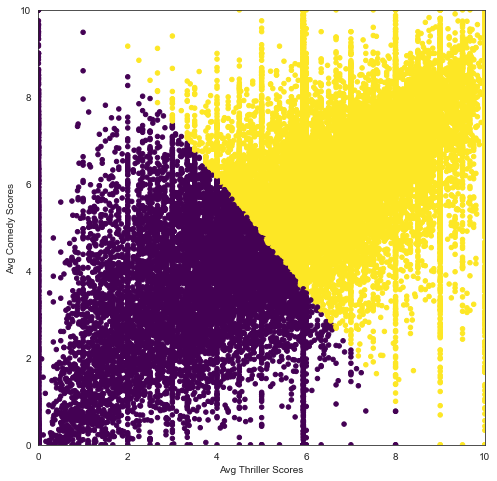

In [134]:
# Instance of KMeans to find 4 clusters
kmeans = KMeans(n_clusters= 2)

# Use fit_predict to cluster the dataset
predictions = kmeans.fit_predict(temp)

# Plot
draw_clusters(temp, predictions)
print("Clusters' centers are:") 
print(kmeans.cluster_centers_)

In [135]:
# avg romance and thriller scores
temp.head()

my_score          
genre      Comedy  Thriller
user_id                    
1        5.398649  4.583333
37       5.423077  9.000000
66       7.126316  7.000000
81       7.692308  8.666667
112      8.600000  5.934409